In [10]:

import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


#Reading files and cleaning data
#PRICE DATAFRAME
price_df = pd.read_csv('airbnb_price.csv')


#ROOM_TYPE DATAFRAME
room_type_data = pd.ExcelFile('airbnb_room_type.xlsx')
room_type_df = room_type_data.parse('airbnb_room_type')

#LAST_REVIEW DATAFRAME
last_review_df = pd.read_csv('airbnb_last_review.tsv', sep='\t')



In [15]:
# Join the three data frames together into one
listings = pd.merge(price_df, room_type_df, on='listing_id')
listings = pd.merge(listings, last_review_df, on='listing_id')

listings = pd.DataFrame(listings)

listings['last_review'] = pd.to_datetime(listings['last_review'], format='mixed')
listings['last_review'] = listings['last_review'].sort_values(ascending=True)

listings['room_type'] = listings['room_type'].astype(str)
listings['room_type'] = listings['room_type'].str.title()
listings['room_type'] = listings['room_type'].astype('category')
assert listings['room_type'].dtype == 'category'

listings['price'] = listings['price'].str.replace(' dollars', '')
listings['price'] = listings['price'].astype(float)
listings['price'] = listings['price'].replace(0.0, 10.0)
assert listings['price'].dtype == float


In [16]:
print(type(listings['last_review']))
listings['review_month'] = listings['last_review'].dt.month
listings['review_day'] = listings['last_review'].dt.day
print(listings['price'].describe())
print(listings.head(2))

<class 'pandas.core.series.Series'>
count    25209.000000
mean       141.780713
std        147.346559
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64
   listing_id  price             nbhood_full                      description  \
0        2595  225.0      Manhattan, Midtown            Skylit Midtown Castle   
1        3831   89.0  Brooklyn, Clinton Hill  Cozy Entire Floor of Brownstone   

         room_type    host_name last_review  review_month  review_day  
0  Entire Home/Apt     Jennifer  2019-05-21             5          21  
1  Entire Home/Apt  LisaRoxanne  2019-07-05             7           5  


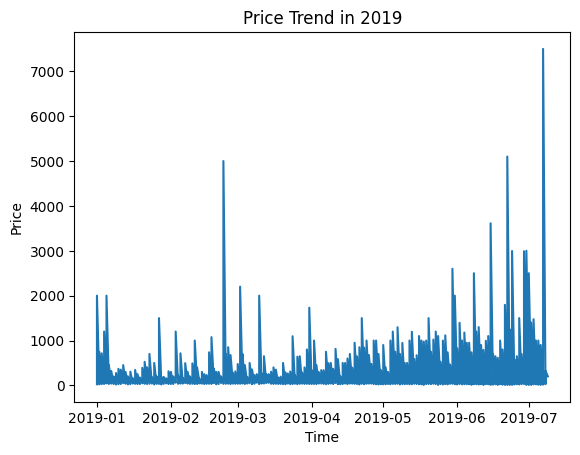

In [17]:
#Visualize

sns.lineplot(x='last_review', y='price', data=listings, legend='auto', estimator=None)
plt.title('Price Trend in 2019')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()